The DFT: Numerical Aspect
we will look at the differences in precision between the naive way of computing DFT and FFT algorithm

The DFT produces a complex valued vector that we can represent eithe rvia its real and imaginary parts or via its magnitude and phase


Direct Implementation

Numerical errors i real and imaginary parts

the DFT can be easily implemented using the change of basis matrix WN. 
we can easily generate the matrix WN in python




In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"]=(14,4);

In [11]:
def dft_matrix(N):
    #create a 1xN matrix containing indices 0 to N-1
    a = np.expand_dims(np.arange(N), 0)
    
    #we take advantage of numpy broadcasting to create the matrix
    W = np.exp(-2j*(np.pi/N)*(a.T*a))
    
    return W

Lets try it out on a short signal and verify the invertibility of the transform

In [12]:
x = np.array([21,22,45])

#DFT matrix
N = len(x)
W = dft_matrix(N)

#the DFT
X= np.dot(W, x)

#inverse DFT
x_hat = np.dot(W.T.conjugate(), X)/N

print(x-x_hat)

[-3.55271368e-15+1.18423789e-14j  7.10542736e-15+2.36847579e-15j
  0.00000000e+00-6.69834558e-15j]


as you can see the difference between the originalv ector and the "reconstructed" vector is not exactly the zero. This is due to small numerical errors that accumulate ni the N2 multiplications and additions needed by the direct and inverse transforms

while minor in this case, this numerical imprecision can be very annoying if we switch to a magnitude /phase representation

<StemContainer object of 3 artists>

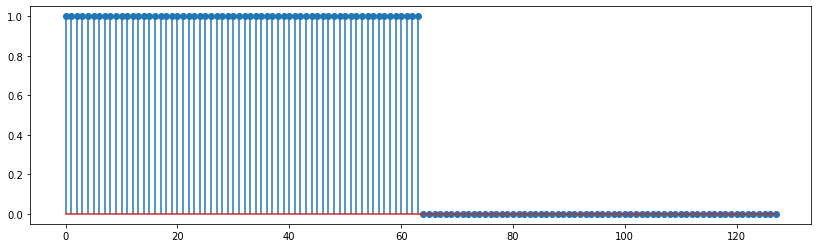

In [13]:
#length 128 signal
N=128
x = np.zeros(N)
x[0:64]=1

plt.stem(x, use_line_collection=True)

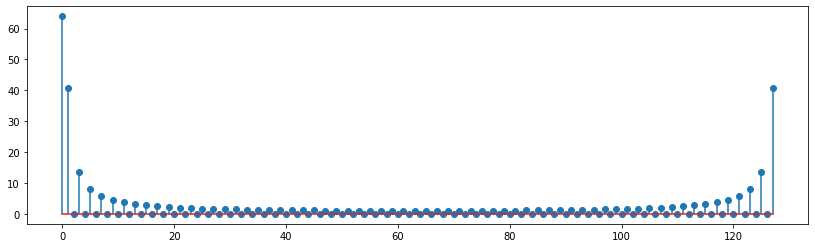

<StemContainer object of 3 artists>

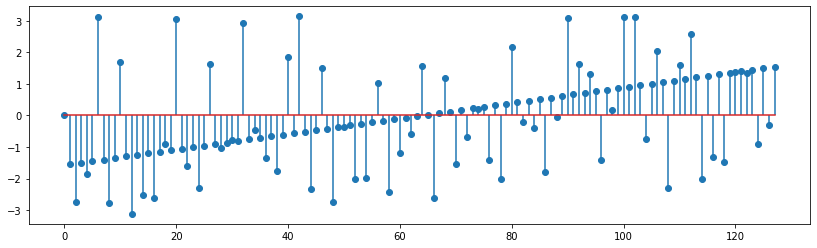

In [14]:
W = dft_matrix(N)

#DFT
X= np.dot(W, x)
plt.stem(abs(X), use_line_collection=True)
plt.show()

plt.stem(np.angle(X), use_line_collection=True)

Clearly we have a problem with the phase, although the magnitude looks nice. This is inherent to the fact that the phase is computed by taking the arctangent of a ratio. When the computed DFT values are close to zero, the denominator of the ratio will be also close to zero and any numerical error in its value will lead to large errors in the phase. As we will see in the next section, this problem can be alleviated by using smarter algorithms than the direct naive method.

Let's still verify the inverse DFT:

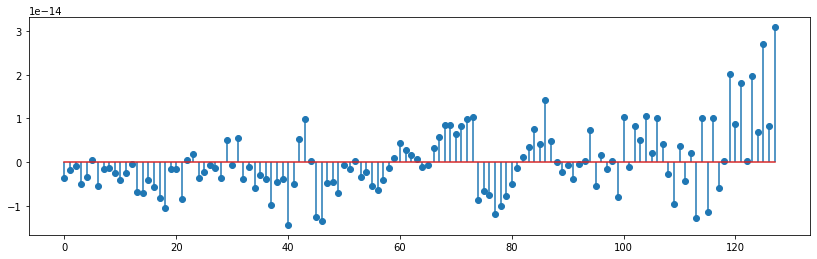

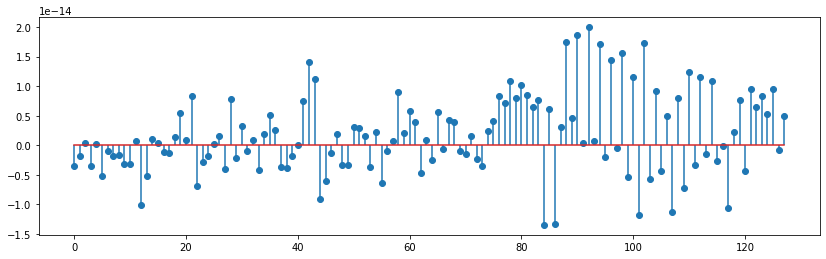

In [15]:
x_hat = np.dot(W.T.conjugate(), X) / N

plt.stem(np.real(x_hat - x), use_line_collection=True);
plt.show();
plt.stem(np.imag(x_hat), use_line_collection=True);

Again the error is very small but clearly not zero

The FFT Algorithm

the FFT algo computes the DFT recursively by succesivelu splitting the data vector into smaller pieces  and recombining the results. The most well known version of the FFT operates on data lengths that are power of two but efficient algos exist for all lengths that afre factorizablr into powers of small primes

The FFT algo is not only much faster that the direct method but its also better conditioned numerically. This is because in FFT implemetation great care is applied to minimizing the number of trigonometric factors.

As you can see in the example below, the phase is now accurate and the reconstruction error is almost two orders of magnitude smaller, basically equal to the numerical precision of floating point variables.

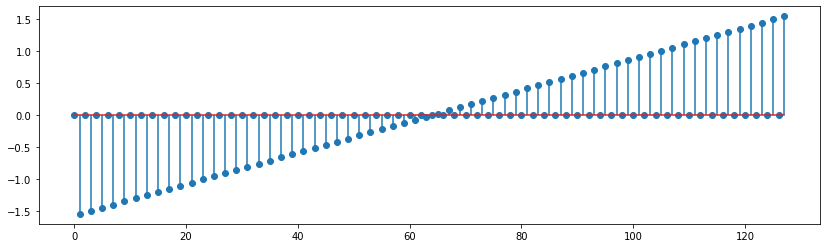

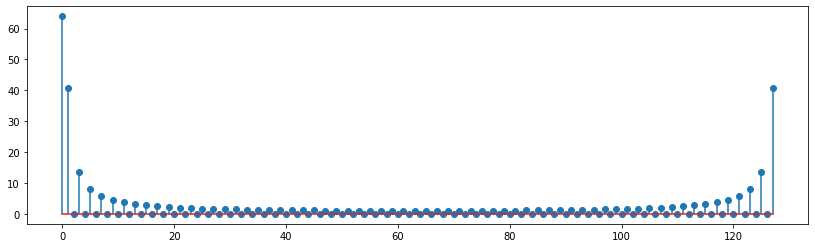

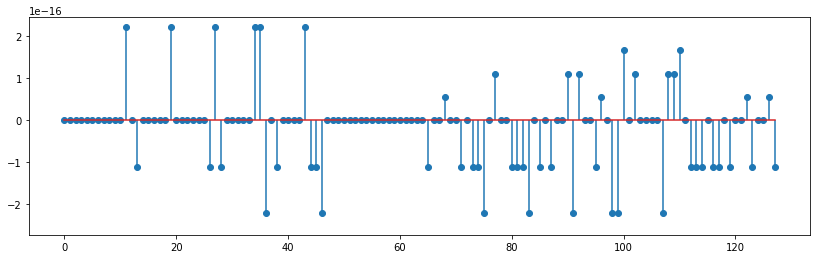

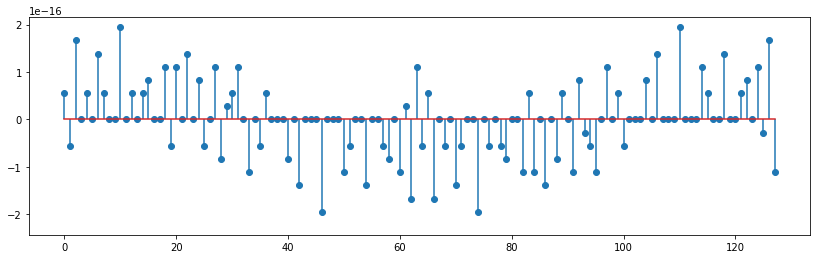

In [19]:
X = np.fft.fft(x)
x_hat = np.fft.ifft(X)

plt.stem(np.angle(X), use_line_collection=True);
plt.show()

plt.stem(abs(X),  use_line_collection=True)
plt.show();

plt.stem(np.real(x_hat-x), use_line_collection=True);
plt.show();

plt.stem(np.imag(x_hat), use_line_collection=True);
